
## Brent Oil Price Analysis - Task 1
This script implements Task 1 of the challenge, focusing on defining the data analysis workflow
and understanding the model and data.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# Import utility functions
from scripts.oil_analysis_utils import *  

In [4]:
# # Set plotting style
# plt.style.use('seaborn')
# sns.set_palette('deep')

In [5]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Preprocessing

In [6]:

df = load_and_preprocess_data('../data/Copy of BrentOilPrices.csv')

In [9]:
df.head(10)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58
1987-06-01,18.65


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


In [13]:
df.isnull().sum()

Price    0
dtype: int64

In [ ]:
# 2. Handle Missing Values
df, missing_values = handle_missing_values(df)
print("Missing values in each column:")
print(missing_values)


Handling missing values...
Missing values in each column:
Price    0
dtype: int64


In [17]:
# 3. Feature Engineering

df = add_features(df)
print("Dataset with new features:")
df.head()

Dataset with new features:


,Price,Returns,Volatility,MA_50,MA_200,Momentum,Log_Returns
Date,,,,,,,
1987-05-20,18.63,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,-0.009662,NaN,NaN,NaN,NaN,-0.009709
1987-05-22,18.55,0.005420,NaN,NaN,NaN,NaN,0.005405
1987-05-25,18.60,0.002695,NaN,NaN,NaN,NaN,0.002692
1987-05-26,18.63,0.001613,NaN,NaN,NaN,NaN,0.001612


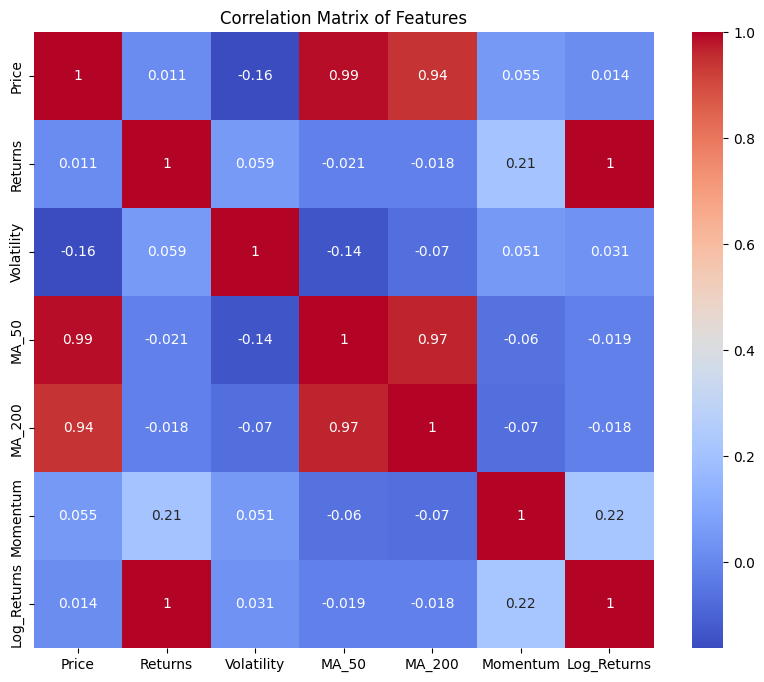

In [18]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


Performing time series analysis...


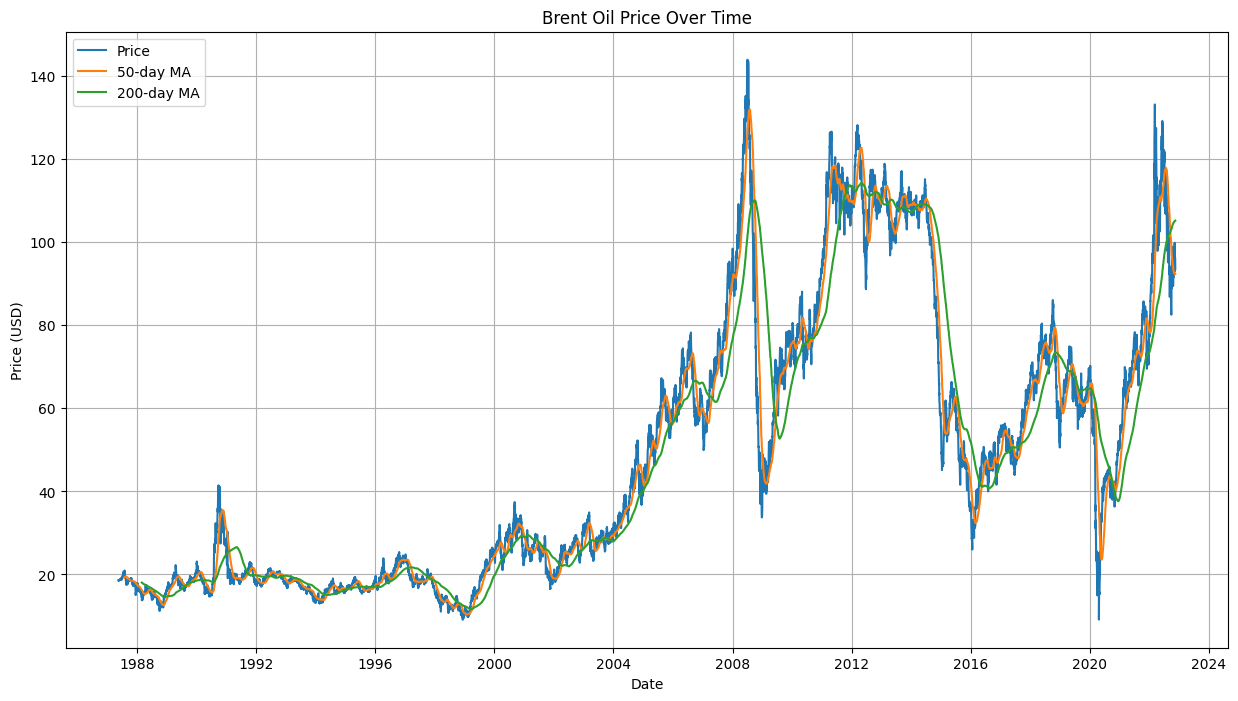

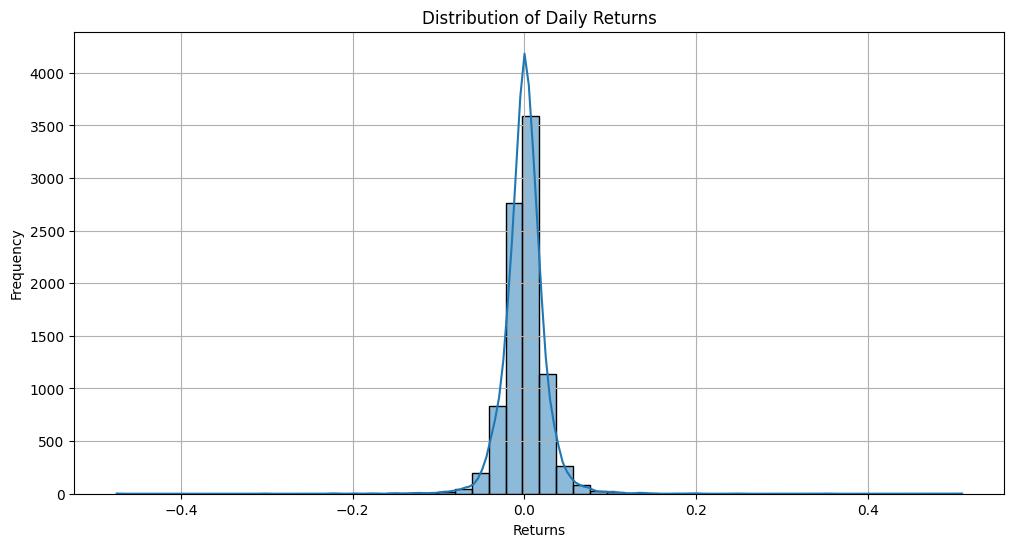

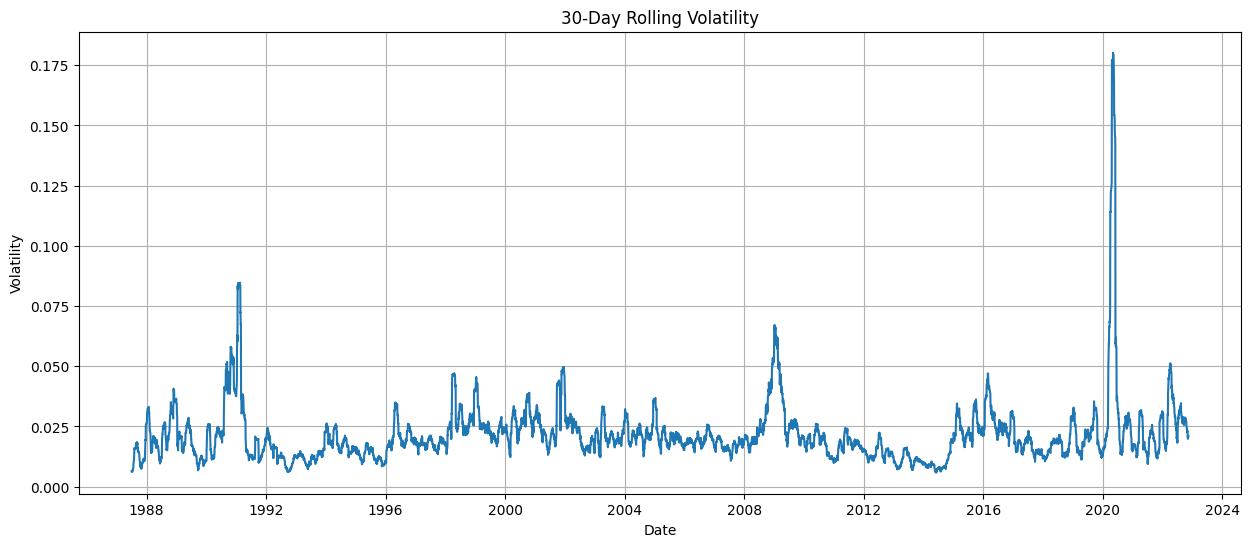

In [20]:
# 4. Time Series Analysis
print("\nPerforming time series analysis...")
plot_time_series(df)
plot_returns_distribution(df)
plot_volatility(df)

In [22]:
 # 5. Stationarity Testing
print("\nChecking stationarity...")
price_stationarity = check_stationarity(df['Price'])
print("Stationarity Test Results for Price:")
price_stationarity


Checking stationarity...
Stationarity Test Results for Price:


{'ADF Statistic': np.float64(-1.993856011392467),
 'p-value': np.float64(0.2892735048934032),
 'Critical values': {'1%': np.float64(-3.4310783342658615),
  '5%': np.float64(-2.861861876398633),
  '10%': np.float64(-2.566941329781918)}}

In [24]:
returns_stationarity = check_stationarity(df['Returns'].dropna())
print("\nStationarity Test Results for Returns:")
returns_stationarity


Stationarity Test Results for Returns:


{'ADF Statistic': np.float64(-17.11168481990269),
 'p-value': np.float64(7.35823036703151e-30),
 'Critical values': {'1%': np.float64(-3.431078253154464),
  '5%': np.float64(-2.8618618405570615),
  '10%': np.float64(-2.5669413107032493)}}


Analyzing autocorrelation...
Autocorrelation Analysis for Prices:


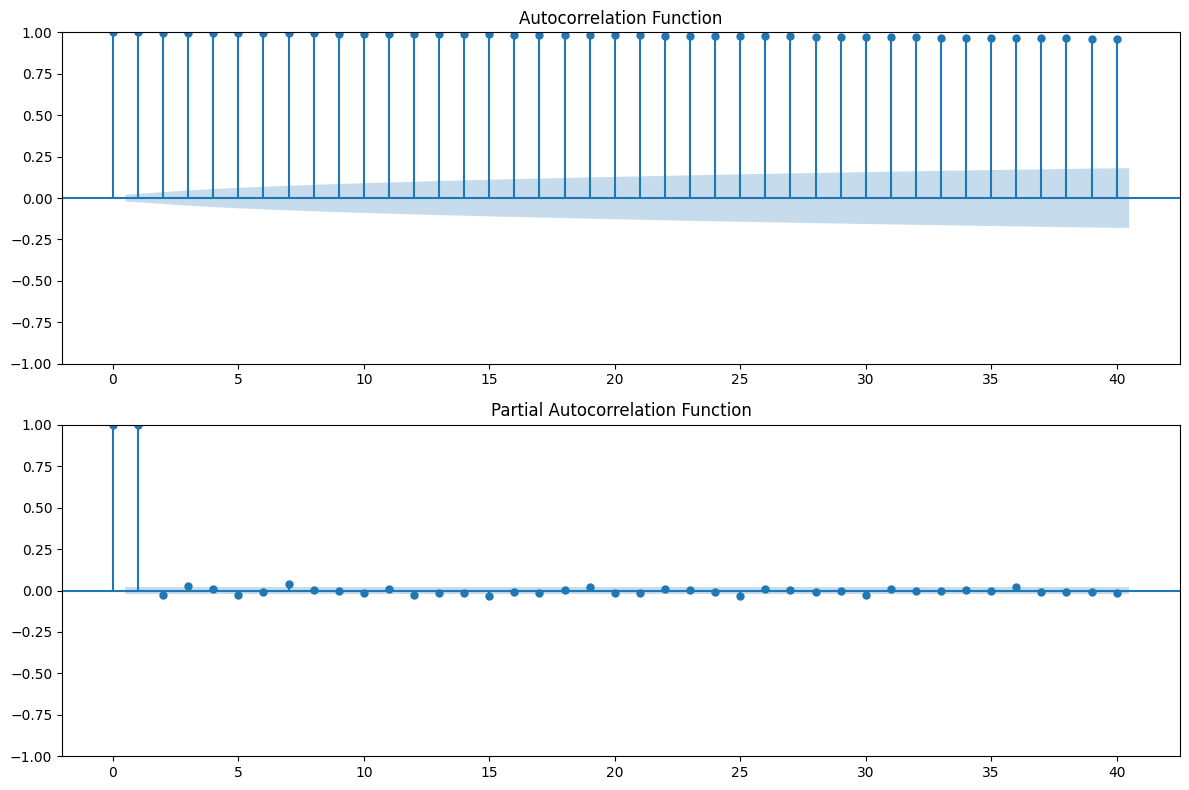


Autocorrelation Analysis for Returns:


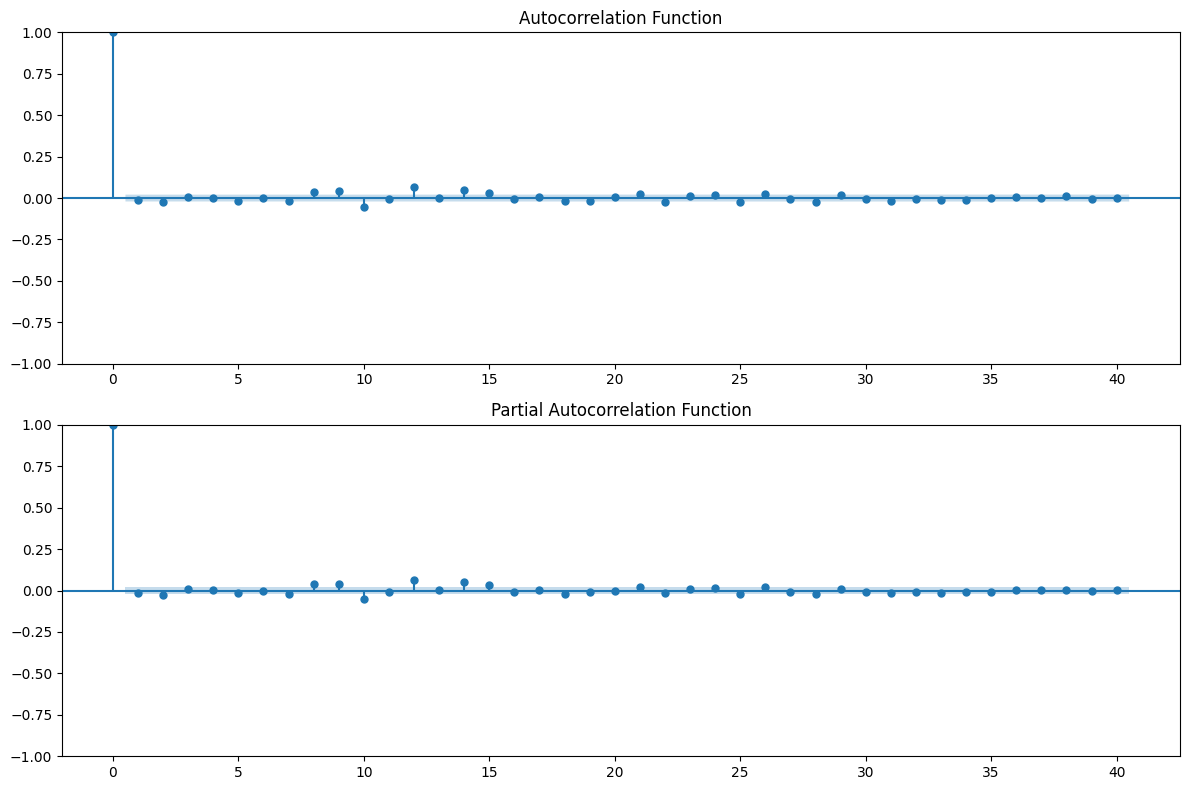

In [26]:
# 6. Autocorrelation Analysis
print("\nAnalyzing autocorrelation...")
print("Autocorrelation Analysis for Prices:")
analyze_autocorrelation(df['Price'])
    
print("\nAutocorrelation Analysis for Returns:")
analyze_autocorrelation(df['Returns'].dropna())

### Summary Statistics

In [28]:

print("\nGenerating summary statistics...")
summary_stats = generate_summary_statistics(df)
print("Dataset Summary:")
print(f"Date Range: {summary_stats['date_range']['start'].date()} to {summary_stats['date_range']['end'].date()}")
print(f"Total Trading Days: {summary_stats['date_range']['total_days']}\n")



Generating summary statistics...
Dataset Summary:
Date Range: 1987-05-20 to 2022-11-14
Total Trading Days: 9011



In [ ]:
print("Price Statistics:")
for key, value in summary_stats['price_statistics'].items():
    print(f"{key.capitalize()}: ${value:.2f}")

print("\nReturns Statistics:")
for key, value in summary_stats['returns_statistics'].items():
     print(f"{key.capitalize()}: {value:.4f}")

print("\nVolatility Statistics:")
for key, value in summary_stats['volatility_statistics'].items():
    print(f"{key.capitalize()}: {value:.4f}")